In [46]:
from Bio.PDB import *
import os
import numpy as np
import pickle
import csv
import matplotlib.pyplot as plt
from pygsp import graphs

import networkx as nx

In [47]:
amino_hydrophobicity =  {'A': 1.8,'R':-4.5,'N':-3.5,'D':-3.5,'C': 2.5,
       'Q':-3.5,'E':-3.5,'G':-0.4,'H':-3.2,'I': 4.5,
       'L': 3.8,'K':-3.9,'M': 1.9,'F': 2.8,'P':-1.6,
       'S':-0.8,'T':-0.7,'W':-0.9,'Y':-1.3,'V': 4.2 }
amino_molecular_mass =  {'A': 89.09404,'R':174.20274,'N':132.11904,'D':133.10384,'C':121.15404 ,
       'Q':146.14594,'E':147.13074,'G':75.06714,'H':155.15634,'I':131.17464,
       'L':131.17464,'K':146.18934,'M':149.20784,'F':165.19184,'P':115.13194,
       'S':105.09344,'T':119.12034,'W':204.22844,'Y':181.19124,'V':117.14784}

reader = csv.DictReader(open('../protein_data.csv', 'r'))
lnkf_values = dict()
for line in reader:
    lnkf_values[line['PDB ID']] = line['Ln (K_f)']  

In [64]:
## Temporary Code to finalize distance cutoff

distance_cutoffs = np.arange(6, 8, 0.1)

for distance_cutoff in distance_cutoffs:
    print (distance_cutoff, end=', ')
    folders = os.listdir('../new_pdb/')
    G_dict = dict()
    NX_dict = dict()
    for index, folder in enumerate(folders):
#         print (folder, end=', ') 
        n = np.asmatrix(np.loadtxt('../new_pdb/' + folder + '/distance_matrix.csv', delimiter=','))
        n[n >= distance_cutoff] = 0
        # taking |j-i| as weights
        for i in range(np.shape(n)[0]): 
            for j in range(np.shape(n)[1]): 
                if n[i,j] > 0: n[i,j] = abs(j-i)
        G = graphs.Graph(n)
        G.compute_fourier_basis()
        G_dict[folder] = G
        NX_dict[folder] = nx.Graph(n)
        
    lfc_cutoffs = np.arange(0.01,1,0.01)
    points = np.zeros_like(lfc_cutoffs)
    for p, lfc_cutoff in enumerate(lfc_cutoffs):
        lfc = np.zeros(len(folders))
        lnkf = np.zeros(len(folders))
        for index, folder in enumerate(folders):
            G = G_dict[folder]
            sequence = pickle.load(open('../new_pdb/' + folder + '/sequence.p', 'rb'))
            signal = [amino_hydrophobicity[s] for s in sequence]
            signal = np.array(signal)
            signal_hat = G.gft(signal)
            lfc[index] = np.sum(abs(signal_hat[G.e < G.lmax*lfc_cutoff])) / np.sum(abs(signal_hat))
            lnkf[index] = lnkf_values[folder.upper()]
        points[p] = np.corrcoef(lfc, lnkf)[0,1]
    print (np.max(points), end=', ')
    print (lfc_cutoffs[np.argmax(points)])

6.0, 0.3983580399925857, 0.4
6.1, 0.4387595774359039, 0.12
6.199999999999999, 0.4554826837401063, 0.24000000000000002
6.299999999999999, 0.43241659350342804, 0.23
6.399999999999999, 0.5739699758321668, 0.27
6.499999999999998, 0.5702960745854756, 0.26
6.599999999999998, 0.6070046438799659, 0.26
6.6999999999999975, 0.5791492785079799, 0.18000000000000002
6.799999999999997, 0.5674233286344216, 0.22
6.899999999999997, 0.5822061885496976, 0.26
6.9999999999999964, 0.5430559150976974, 0.24000000000000002
7.099999999999996, 0.5965005702753295, 0.28
7.199999999999996, 0.616950558522935, 0.28
7.299999999999995, 0.6319947128566133, 0.27
7.399999999999995, 0.5987531465785177, 0.28
7.499999999999995, 0.6054472184036793, 0.33
7.599999999999994, 0.5887639961487825, 0.25
7.699999999999994, 0.5923889404764596, 0.3
7.799999999999994, 0.5698917593020792, 0.22
7.899999999999993, 0.5845903497654759, 0.22


In [74]:
distance_cutoff = 7.3
folders = os.listdir('../new_pdb/')

G_dict = dict()
NX_dict = dict()

for index, folder in enumerate(folders):
    print (folder, end=', ') 
    n = np.asmatrix(np.loadtxt('../new_pdb/' + folder + '/distance_matrix.csv', delimiter=','))
    n[n >= distance_cutoff] = 0
    
    # taking boolean adjacency 0-1
#     n[n > 0] = 1
    
    # taking |j-i| as weights
    for i in range(np.shape(n)[0]):
        for j in range(np.shape(n)[1]):
            if n[i,j] > 0:
                n[i,j] = abs(j-i)
    
    G = graphs.Graph(n)
    G.compute_fourier_basis()
    
    G_dict[folder] = G
    NX_dict[folder] = nx.Graph(n)

2abd, 1tit, 1shg, 1hz6, 2acy, 1vik, 1urn, 1fkb, 1lop, 2vik, 1pin, 1ebd, 1coa, 1csp, 1brs, 3mef, 1aey, 1div, 1ycc, 1g6p, 1enh, 1mjc, 1pnj, 2hqi, 1imq, 1shf, 1c8c, 1ubq, 1nyf, 1hdn, 1pba, 1c9o, 1vii, 2ait, 1srl, 256b, 2ci2, 1pgb, 1aye, 1ten, 1poh, 1pks, 1ris, 1wit, 1hrc, 1aps, 1bdd, 1pca, 1cis, 2ptl, 1lmb, 2pdd, 

0.6319947128566133
0.27


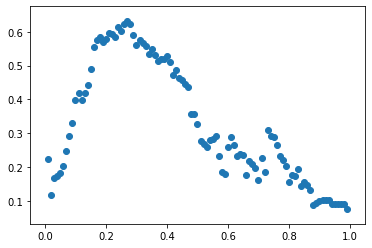

In [80]:
lfc_cutoffs = np.arange(0.01,1,0.01)
points = np.zeros_like(lfc_cutoffs)


for p, lfc_cutoff in enumerate(lfc_cutoffs):
    
    lfc = np.zeros(len(folders))
    lnkf = np.zeros(len(folders))

    for index, folder in enumerate(folders):
        G = G_dict[folder]
        sequence = pickle.load(open('../new_pdb/' + folder + '/sequence.p', 'rb'))
        signal = [amino_hydrophobicity[s] for s in sequence]
#         signal = [amino_molecular_mass[s] for s in sequence]
#         signal = G.d
#         signal = list(nx.degree_centrality(NX_dict[folder]).values())
#         signal = list(nx.betweenness_centrality(NX_dict[folder]).values())
#         signal = list(nx.algorithms.link_analysis.pagerank(NX_dict[folder]).values())
        signal = np.array(signal)
        signal_hat = G.gft(signal)
        lfc[index] = np.sum(abs(signal_hat[G.e < G.lmax*lfc_cutoff])) / np.sum(abs(signal_hat))
        lnkf[index] = lnkf_values[folder.upper()]
    
    points[p] = np.corrcoef(lfc, lnkf)[0,1]
    
plt.scatter(lfc_cutoffs, points)
print (np.max(points))
print (lfc_cutoffs[np.argmax(points)])
plt.show()

In [73]:
for i in range(len(points)):
    print (lfc_cutoffs[i], end=', ')
    print (points[i])

0.01, 0.22398575107715873
0.02, 0.11816009514777345
0.03, 0.16737538524827142
0.04, 0.1732519194849328
0.05, 0.18384220134135063
0.060000000000000005, 0.2026100754069697
0.06999999999999999, 0.24675685491831395
0.08, 0.2913432584943574
0.09, 0.33185581200019315
0.09999999999999999, 0.3995493899678686
0.11, 0.4182600000020445
0.12, 0.3979770010509056
0.13, 0.41773877817438276
0.14, 0.4424682510598287
0.15000000000000002, 0.488909415452383
0.16, 0.5547444967943163
0.17, 0.5750465670296235
0.18000000000000002, 0.5831480572392517
0.19, 0.5695848631446345
0.2, 0.5780981548813208
0.21000000000000002, 0.5953449678577158
0.22, 0.591924849657204
0.23, 0.5853170687180675
0.24000000000000002, 0.6145722461999751
0.25, 0.6025513736423068
0.26, 0.6217920608709835
0.27, 0.6319947128566133
0.28, 0.623880415380846
0.29000000000000004, 0.5895803059754589
0.3, 0.5608948040956991
0.31, 0.5749093227310678
0.32, 0.5664871591299115
0.33, 0.5567754964354097
0.34, 0.5351070464832284
0.35000000000000003, 0.5479

In [45]:
lfc_cutoff = 0.17

for index, folder in enumerate(folders):
    G = G_dict[folder]
    sequence = pickle.load(open('../new_pdb/' + folder + '/sequence.p', 'rb'))
#         signal = [amino_hydrophobicity[s] for s in sequence]
#         signal = [amino_molecular_mass[s] for s in sequence]
#         signal = G.d
#     signal = list(nx.degree_centrality(NX_dict[folder]).values())
#     signal = list(nx.algorithms.link_analysis.pagerank(NX_dict[folder]).values())
    signal = list(nx.betweenness_centrality(NX_dict[folder]).values())
    signal = np.array(signal)
    signal_hat = G.gft(signal)
    print (folder, end=', ')
    print (lnkf_values[folder.upper()], end=', ')
    print (np.sum(abs(signal_hat[G.e < G.lmax*lfc_cutoff])) / np.sum(abs(signal_hat)))
#     lnkf[index] = lnkf_values[folder.upper()]
    

1aey, 2.09, 0.6326428366228393
1aps, 1.48, 0.5669040713401061
1aye, 6.8, 0.7904018239578298
1bdd, 11.75, 0.7846573010146543
1brs, 3.4, 0.7221350390740529
1c8c, 6.91, 0.6442369305297038
1c9o, 7.2, 0.6300201015311622
1cis, 3.87, 0.5742087992759318
1coa, 3.87, 0.6626658276628302
1csp, 6.98, 0.6100804675696064
1div, 6.58, 0.8726760111422861
1ebd, 9.68, 0.8419179316294352
1enh, 10.53, 0.7468667698073521
1fkb, 1.46, 0.6033119434356425
1g6p, 6.3, 0.5800373903184913
1hdn, 2.7, 0.6373596393229798
1hrc, 8.76, 0.8314042995874883
1hz6, 4.1, 0.6253705746586425
1imq, 7.31, 0.8147131945659879
1lmb, 8.5, 0.7757416156966852
1lop, 6.6, 0.8009249785187937
1mjc, 5.24, 0.6821034373305962
1nyf, 4.54, 0.6669149012639224
1pba, 6.8, 0.7787696116452214
1pca, 6.8, 0.790490390619803
1pgb, 6, 0.7101036141468393
1pin, 9.44, 0.7932285936150567
1pks, 1.05, 0.6655849626023496
1pnj, 1.10, 0.6999646711573968
1poh, 2.7, 0.7282079412140793
1ris, 5.9, 0.6857801116976119
1shf, 4.5, 0.6113134453764338
1shg, 1.41, 0.552654966

    Distance_Cutoff | LFC_Cutoff | Max. Correlation
    ----------------|------------|-----------------
    6.5             | 0.26       | 0.570
    7.0             | 0.24       | 0.543
    7.1             | 0.28       | 0.596
    7.2             | 0.28       | 0.616
    7.25            | 0.27       | 0.621
    7.3             | 0.27       | 0.631
    7.35            | 0.27       | 0.593
    7.4             | 0.28       | 0.598
    7.5             | 0.33       | 0.605
    7.75            | 0.23       | 0.584
    8.0             | 0.19       | 0.578
    8.5             | 0.16       | 0.527

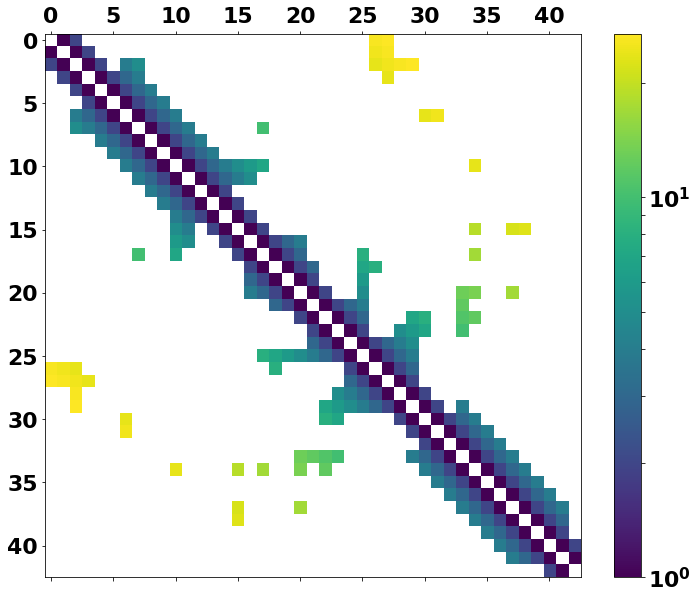

In [138]:
## Plotting a contact map

import matplotlib.colors
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cx = ax.matshow(n, interpolation='nearest', aspect='auto', norm=matplotlib.colors.LogNorm())
fig.colorbar(cx)
plt.show()

<br>

## Code to plot correlation vs rig_cutoff

6.0 0.6361930668834823 0.46
6.05 0.6047681879629536 0.44
6.1 0.5927385442877645 0.22
6.1499999999999995 0.6014229725667694 0.2
6.199999999999999 0.5736914192646833 0.31
6.249999999999999 0.5748333388585409 0.24000000000000002
6.299999999999999 0.6090222509405628 0.24000000000000002
6.349999999999999 0.6081803279904111 0.29000000000000004
6.399999999999999 0.6994049996821627 0.22
6.449999999999998 0.6842906737649375 0.21000000000000002
6.499999999999998 0.6786973981471303 0.19
6.549999999999998 0.6701201306505117 0.21000000000000002
6.599999999999998 0.7125524932441535 0.2
6.649999999999998 0.701327733605358 0.2
6.6999999999999975 0.68470040942088 0.21000000000000002
6.749999999999997 0.6899139201134182 0.19
6.799999999999997 0.6866230896144517 0.21000000000000002
6.849999999999997 0.688655347551868 0.21000000000000002
6.899999999999997 0.6949522932820607 0.21000000000000002
6.949999999999997 0.7221938170776916 0.22
6.9999999999999964 0.6849715782694681 0.19
7.049999999999996 0.67331679

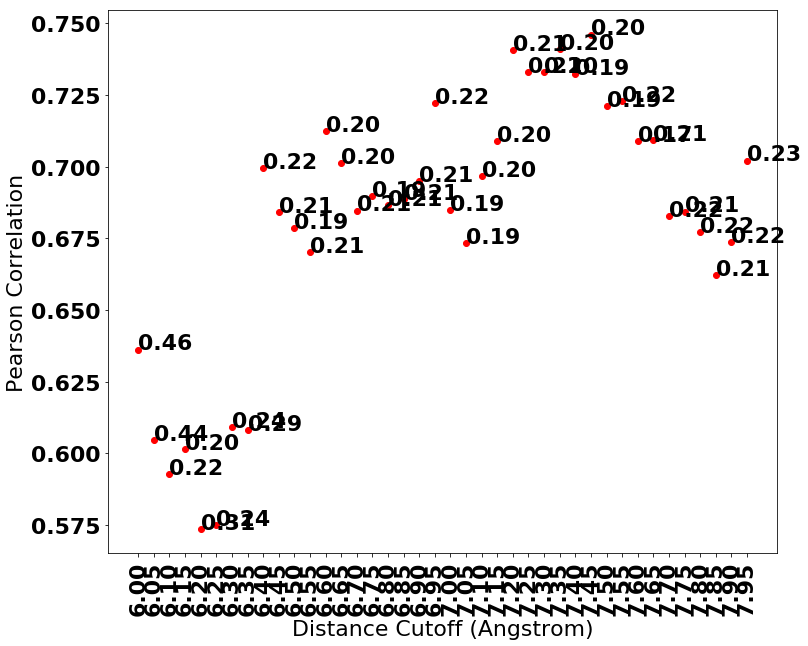

In [144]:
distance_cutoffs = np.arange(6, 8, 0.05)
max_corr = np.zeros_like(distance_cutoffs)
lfc_cutoff_max = np.zeros_like(distance_cutoffs)

for d, distance_cutoff in enumerate(distance_cutoffs):
    print distance_cutoff,
    folders = os.listdir('../new_pdb/')

    G_dict = dict()

    for index, folder in enumerate(folders):
#         print folder, 
        n = np.asmatrix(np.loadtxt('../new_pdb/' + folder + '/distance_matrix.csv', delimiter=','))
        n[n >= distance_cutoff] = 0

        # taking boolean adjacency 0-1
    #     n[n > 0] = 1

        # taking |j-i| as weights
        for i in range(np.shape(n)[0]):
            for j in range(np.shape(n)[1]):
                if n[i,j] > 0:
                    n[i,j] = abs(j-i)

        G = graphs.Graph(n)
        G.compute_fourier_basis()

        G_dict[folder] = G
    lfc_cutoffs = np.arange(0.01,1,0.01)
    points = np.zeros_like(lfc_cutoffs)

    for p, lfc_cutoff in enumerate(lfc_cutoffs):

        lfc = np.zeros(len(folders))
        lnkf = np.zeros(len(folders))

        for index, folder in enumerate(folders):
            G = G_dict[folder]
            sequence = pickle.load(open('../new_pdb/' + folder + '/sequence.p'))
#             signal = [amino_hydrophobicity[s] for s in sequence]
            signal = [amino_molecular_mass[s] for s in sequence]
            signal = np.array(signal)
            signal_hat = G.gft(signal)
            lfc[index] = np.sum(abs(signal_hat[G.e < G.lmax*lfc_cutoff])) / np.sum(abs(signal_hat))
            lnkf[index] = lnkf_values[folder.upper()]

        points[p] = np.corrcoef(lfc, lnkf)[0,1]
    max_corr[d] = np.max(points)
    lfc_cutoff_max[d] = lfc_cutoffs[np.argmax(points)]
    print max_corr[d],
    print lfc_cutoff_max[d]
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cx = plt.plot(distance_cutoffs, max_corr, 'ro')
for i, txt in enumerate(lfc_cutoff_max):
    ax.annotate('{:.2f}'.format(txt), (distance_cutoffs[i],max_corr[i]))
plt.xticks(distance_cutoffs, rotation="vertical")
plt.xlabel('Distance Cutoff (Angstrom)')
plt.ylabel('Pearson Correlation')

plt.show()

In [148]:
folder

'2pdd'

### The numbers above the points are the LCF_cutoff values at which the corresponding highest correlation value was observed.
